In [12]:
import numpy as np
import pandas as pd

import altair as alt

import bokeh.plotting
import bokeh.io

bokeh.io.output_notebook()
alt.data_transformers.enable('json')

Loading BokehJS ...

DataTransformerRegistry.enable('json')

### Problem 1.2 (Beetle Hypnotists)

**a)** Given the x and y coordinates of the ant's body parts in units of pixels, we want to create two columns 'x (mm)' and 'y (mm)' with coordinates in millimeters. To do this, we know that the interpixel distance is 0.08 millimeters. Since the interpixel distance is equal to the length of one pixel, we can simply multiply the coordinates in pixels by the interpixel distance to get the coordinates in millimeters.

We will start by loading in the data and taking a look.

In [13]:
# Read in the data
df = pd.read_csv('../data/ant_joint_locations.csv', comment='#')

In [14]:
df.head()

,frame,beetle_treatment,ID,bodypart,x_coord,y_coord,likelihood
0,0,dalotia,0,head,73.086,193.835,1.0
1,1,dalotia,0,head,73.730,194.385,1.0
2,2,dalotia,0,head,75.673,195.182,1.0
3,3,dalotia,0,head,77.319,196.582,1.0
4,4,dalotia,0,head,78.128,197.891,1.0


Now we will convert the coordinates from pixels to millimeters.

In [15]:
# Convert the coordinates from pixels to units of millimeters.
ipix = 0.08
df['x (mm)'] = df['x_coord'] * ipix
df['y (mm)'] = df['y_coord'] * ipix

Now, new columns with the x and y coordinates in millimeters have been created.

In [16]:
df.head()

,frame,beetle_treatment,ID,bodypart,x_coord,y_coord,likelihood,x (mm),y (mm)
0,0,dalotia,0,head,73.086,193.835,1.0,5.84688,15.50680
1,1,dalotia,0,head,73.730,194.385,1.0,5.89840,15.55080
2,2,dalotia,0,head,75.673,195.182,1.0,6.05384,15.61456
3,3,dalotia,0,head,77.319,196.582,1.0,6.18552,15.72656
4,4,dalotia,0,head,78.128,197.891,1.0,6.25024,15.83128


<p style="background-color:#D9EDF7">
   Good work! Make sure to have a markdown cell between every code block, even if its a small bit of code. We will taks points off for this in the future (HW 3 onward) 5/5<br>
</p>

**b)** First we will create a separate dataframe that contains only information from the thorax.

In [17]:
df_thorax = df[(df['bodypart'] == 'thorax')]

<p style="background-color:#D9EDF7">
   You should use the .loc[] method to exract data from a df with boolean indexing<br>
</p>

Now let's plot the movement traces of the ants by species and ID to see what we're dealing with. In plotting, we make sure that for both plots, the aspect ratio is 1, and the x and y axes have the same scale. This is important for spatial data.

In [18]:
colors = bokeh.palettes.Category20[20]

p = bokeh.plotting.figure(height=350,
                          width=350,
                          title='Dalotia',
                          x_range=(0, 20), y_range=(0, 20),
                          x_axis_label='x (mm)', y_axis_label='y (mm)')
    
p2 = bokeh.plotting.figure(height=350,
                          width=350,
                          title='Sceptobius',
                          x_range=(0, 20), y_range=(0, 20),
                          x_axis_label='x (mm)', y_axis_label='y (mm)')

for i in range(5):
    p.line(df_thorax[df_thorax['ID'] == i]['x (mm)'], df_thorax[df_thorax['ID'] == i]['y (mm)'], color=colors[i], alpha=0.4)
    
for i in range(5,11):
    p2.line(df_thorax[df_thorax['ID'] == i]['x (mm)'], df_thorax[df_thorax['ID'] == i]['y (mm)'], color=colors[i], alpha=0.4)

# show the results
bokeh.plotting.show(bokeh.layouts.row(p, p2))

It is clear in the Sceptobius plot that there were some errors in tracking the ant's position , where there are sharp jumps in the ant's position. This may be because the deep learning algorithm started tracking the bettle's position instead.

At first glance, it appears that ants with Dalotia covers a much greater spatial area than ants with Sceptobius. Let's look at each individual ant's traces and compare ants with Dalotia and ants with Sceptobius side by side to look at the data more carefully.

First, let's convert the frame number to time in seconds for easier interpretation. To convert, we know that there are 28 frames per second.

In [19]:
# Convert frame to time in seconds.
df_thorax['time (s)'] = df_thorax['frame'] / 28

# Add another column for labeling our plots
df_thorax['ID_title'] = 'ID ' + df_thorax['ID'].astype(str)

/Users/julianwagner/anaconda3/envs/tester2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/julianwagner/anaconda3/envs/tester2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


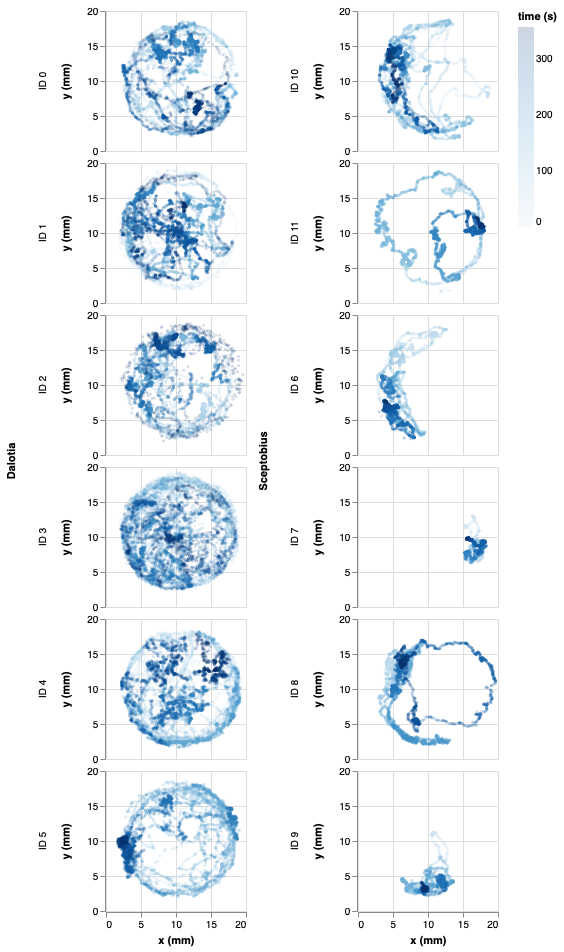

In [20]:
# Plot
d = alt.Chart(df_thorax[df_thorax['beetle_treatment'] == 'dalotia'],
        height=140,
        width=140
    ).mark_point(
        size=1
    ).encode(
        x=alt.X('x (mm):Q', 
            scale=alt.Scale(domain=[0,20])
            ),
        y=alt.Y('y (mm):Q', 
            scale=alt.Scale(domain=[0,20])
            ),
        color='time (s):Q',
        opacity=alt.value(0.2)
    ).facet(
        row=alt.Row('ID_title:N', title='Dalotia')
    )

s = alt.Chart(df_thorax[df_thorax['beetle_treatment'] == 'sceptobius'],
        height=140,
        width=140
    ).mark_point(
        size=1
    ).encode(
        x=alt.X('x (mm):Q', 
            scale=alt.Scale(domain=[0,20])
            ),
        y=alt.Y('y (mm):Q', 
            scale=alt.Scale(domain=[0,20])
            ),
        color='time (s):Q',
        opacity=alt.value(0.2)
    ).facet(
        row=alt.Row('ID_title:N', title='Sceptobius')
    )

d | s

We chose to plot the data points as dots in order to be able to color the points by time. The lighter color points are earlier in time than the darker color points. On the left, we've plotted the positions of ants in the presence of Dalotia beetles, and on the right, we have plotted the positions of ants in the presence of Sceptobius beetles. 

Since the colloseum is symmetric and we want to make sure that it does not appear that the ant is moving further in one direction or another, we are again making sure that the aspect ratio of the plots is 1, and the x and y axes have the same scale. 

<p style="background-color:#D9EDF7">
   Great! Really nice work catching the mistake in the thorax labeling with the line plot. We will talk more about this in data validation. Good job explaining why you chose your plots, and good that you set the square axis labels. 30/30<br>
</p>

**c)** Ants with Dalotia treatment travel around the arena more randomly, covering more of the whole area of the arena. In contrast, ants with Sceptiobius treatment tend to stay in one area of the arena for the duration of the experiment and cover less area in the arena.

<p style="background-color:#D9EDF7">
   Nice 5/5<br>
</p>

## Computing environment

In [17]:
%load_ext watermark

In [20]:
%watermark -v -p numpy,scipy,pandas,bokeh,altair,altair_catplot,bebi103,jupyterlab

CPython 3.7.0
IPython 6.5.0

numpy 1.15.1
scipy 1.1.0
pandas 0.23.4
bokeh 0.13.0
altair 2.2.2
altair_catplot 0.0.3
bebi103 0.0.24
jupyterlab 0.34.9
